In [10]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [11]:
# Step 1: Load and inspect the data
data_file = 'downsampled_data.csv'
data = pd.read_csv(data_file)

In [12]:
data.head()

,FSO_Att,RFL_Att,AbsoluteHumidity,AbsoluteHumidityMax,AbsoluteHumidityMin,Distance,Frequency,Particulate,ParticulateMax,ParticulateMin,...,TemperatureMax,TemperatureMin,Time,Visibility,VisibilityMax,VisibilityMin,WindDirection,WindSpeed,WindSpeedMax,WindSpeedMin
0,2.462847,12.594497,9.323877,9.794615,9.219564,2012.233413,73500000000,0.0,0.0,0.0,...,12.299355,11.580034,0,62342.65502,62365.930963,57591.768372,95.812499,2.368586,3.040772,2.165676
1,2.223769,11.312122,3.879325,4.212172,3.666104,2012.233896,83500000000,0.0,0.0,0.0,...,5.937757,5.470371,0,39233.91891,40261.194736,39164.237830,143.879078,2.012548,2.273151,1.845938
2,2.045930,11.662737,5.808778,6.143394,5.416674,2012.136018,73500000000,0.0,0.0,0.0,...,9.090033,8.281599,1,30489.41499,31745.470267,29332.638892,93.357959,0.542909,1.189790,0.512254
3,2.310503,12.481785,9.137414,9.981590,8.872329,2012.319275,73500000000,0.0,0.0,0.0,...,12.723186,10.985366,1,68708.22615,68881.436362,63170.272763,130.043762,0.000000,0.000000,0.000000
4,2.896595,10.958442,4.630858,4.810972,4.404842,2012.260376,73500000000,0.0,0.0,0.0,...,4.203552,3.858626,2,27775.95875,28453.735166,25643.380312,164.539508,0.621905,2.154707,0.560043


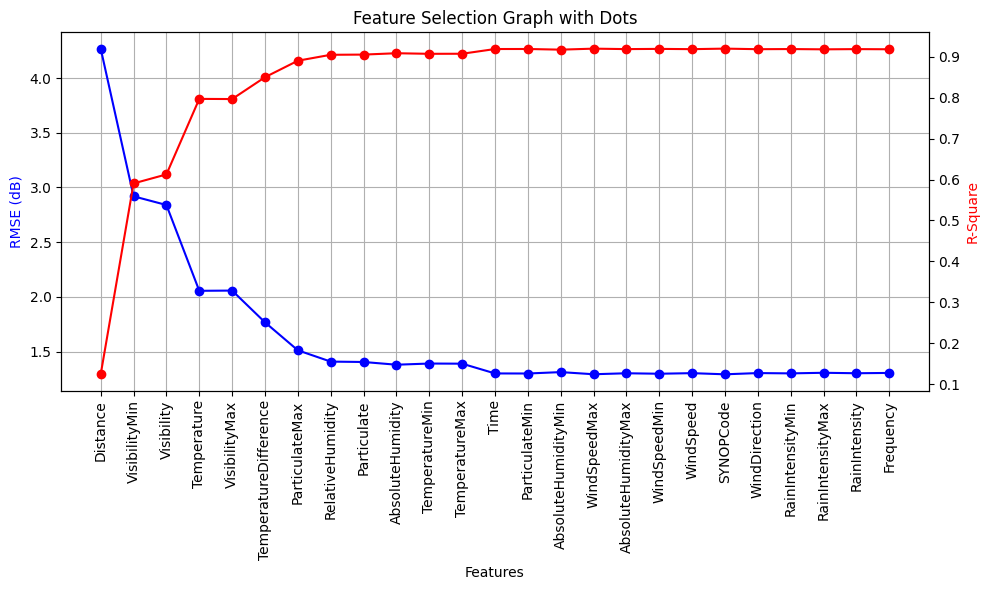

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
data = pd.read_csv('downsampled_data.csv')

# Convert Frequency, SYNOPCode, and Time to categorical values
#data['Frequency'] = data['Frequency'].astype('category')
#data['SYNOPCode'] = data['SYNOPCode'].astype('category')
#data['Time'] = data['Time'].astype('category')

# Prepare the dataset
X = pd.get_dummies(data.drop(columns=['RFL_Att', 'FSO_Att']), drop_first=True)  # Independent variables
y = data['FSO_Att']  # Dependent variable

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest model to rank features by importance
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Extract feature importances
feature_importances = rf_model.feature_importances_
sorted_idx = np.argsort(feature_importances)[::-1]
sorted_features = X.columns[sorted_idx]  # Features sorted by importance

# Prepare for graph
sorted_features_for_graph = sorted_features #[:20]  # Top 20 features
rmse_values_for_graph = []
r2_values_for_graph = []

# Generate RMSE and R^2 for subsets of top features
for i in range(1, len(sorted_features_for_graph) + 1):
    X_train_subset = X_train[sorted_features_for_graph[:i]]
    X_test_subset = X_test[sorted_features_for_graph[:i]]
    
    rf_model_subset = RandomForestRegressor(random_state=42)
    rf_model_subset.fit(X_train_subset, y_train)
    y_pred_subset = rf_model_subset.predict(X_test_subset)
    
    rmse_values_for_graph.append(np.sqrt(mean_squared_error(y_test, y_pred_subset)))
    r2_values_for_graph.append(r2_score(y_test, y_pred_subset))



# Plotting the feature selection graph with dots
fig, ax1 = plt.subplots(figsize=(10, 6))

# RMSE curve with dots
ax1.plot(sorted_features_for_graph, rmse_values_for_graph, color='blue', label="RMSE (dB)", marker='o')
ax1.set_xlabel("Features")
ax1.set_ylabel("RMSE (dB)", color="blue")
ax1.tick_params(axis='x', rotation=90)
ax1.grid()

# R^2 curve with dots
ax2 = ax1.twinx()
ax2.plot(sorted_features_for_graph, r2_values_for_graph, color='red', label="R-Square", marker='o')
ax2.set_ylabel("R-Square", color="red")

# Finalize the plot
plt.title("Feature Selection Graph with Dots")
fig.tight_layout()
plt.show()





In [14]:
y_test.to_csv('Results/y_test_fso.csv', index=False)

In [17]:
sorted_features_for_graph

Index(['Distance', 'VisibilityMin', 'Visibility', 'Temperature',
       'VisibilityMax', 'TemperatureDifference', 'ParticulateMax',
       'RelativeHumidity', 'Particulate', 'AbsoluteHumidity', 'TemperatureMin',
       'TemperatureMax', 'Time', 'ParticulateMin', 'AbsoluteHumidityMin',
       'WindSpeedMax', 'AbsoluteHumidityMax', 'WindSpeedMin', 'WindSpeed',
       'SYNOPCode', 'WindDirection', 'RainIntensityMin', 'RainIntensityMax',
       'RainIntensity', 'Frequency'],
      dtype='object')

# Backward Elimination

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
data = pd.read_csv('downsampled_data.csv')

# Prepare the dataset
X = pd.get_dummies(data.drop(columns=['RFL_Att', 'FSO_Att']), drop_first=True)  # Independent variables
y = data['FSO_Att']  # Dependent variable

# Initialize variables for backward elimination
remaining_features = list(X.columns)
rmse_values = []
r2_values = []
oob_scores = []
feature_counts = []
features_removed = []

# Perform backward elimination
while len(remaining_features) > 0:
    # Train the Random Forest model on the remaining features with OOB
    rf_model = RandomForestRegressor(random_state=42, oob_score=True)
    rf_model.fit(X[remaining_features], y)  # No test split; uses OOB
    
    # OOB R² score
    oob_scores.append(rf_model.oob_score_)
    
    # Predictions on the full dataset (or split dataset if needed)
    y_pred = rf_model.predict(X[remaining_features])
    
    # RMSE and R² scores
    rmse_values.append(np.sqrt(mean_squared_error(y, y_pred)))
    r2_values.append(r2_score(y, y_pred))
    
    # Record the number of features
    feature_counts.append(len(remaining_features))
    
    # Find and remove the least important feature
    feature_importances = rf_model.feature_importances_
    least_important_idx = np.argmin(feature_importances)
    least_important_feature = remaining_features[least_important_idx]
    features_removed.append(least_important_feature)
    remaining_features.remove(least_important_feature)

# Create results DataFrame
results = pd.DataFrame({
    'Features_Remaining': feature_counts,
    'RMSE': rmse_values,
    'R²': r2_values,
    'OOB R²': oob_scores,
    'Removed_Feature': features_removed  # Add None for the last row
})

# Print the results
print("\nBackward Elimination Results with RMSE, R², and OOB:")
print(results)



Backward Elimination Results with RMSE, R², and OOB:
    Features_Remaining      RMSE        R²    OOB R²        Removed_Feature
0                   25  0.446146  0.990135  0.928452              Frequency
1                   24  0.446534  0.990117  0.928398       RainIntensityMax
2                   23  0.446301  0.990128  0.928195          RainIntensity
3                   22  0.444925  0.990188  0.928753          WindDirection
4                   21  0.442625  0.990290  0.929537              SYNOPCode
5                   20  0.442756  0.990284  0.929416       RainIntensityMin
6                   19  0.441372  0.990345  0.929904           WindSpeedMin
7                   18  0.442175  0.990309  0.929540              WindSpeed
8                   17  0.444515  0.990207  0.928926    AbsoluteHumidityMax
9                   16  0.441858  0.990323  0.929690           WindSpeedMax
10                  15  0.447408  0.990079  0.927739    AbsoluteHumidityMin
11                  14  0.446648  

In [6]:
results_df = results
# Find the number of features with the lowest RMSE
lowest_rmse_index = results_df['RMSE'].idxmin()
lowest_rmse_features = results_df.loc[lowest_rmse_index, 'Features_Remaining']
lowest_rmse_value = results_df.loc[lowest_rmse_index, 'RMSE']

# Find the number of features with the highest R²
highest_r2_index = results_df['R²'].idxmax()
highest_r2_features = results_df.loc[highest_r2_index, 'Features_Remaining']
highest_r2_value = results_df.loc[highest_r2_index, 'R²']

# Output the results
print(f"Lowest RMSE: {lowest_rmse_value:.4f} with {lowest_rmse_features} features remaining.")
print(f"Highest R²: {highest_r2_value:.4f} with {highest_r2_features} features remaining.")

Lowest RMSE: 0.4414 with 19 features remaining.
Highest R²: 0.9903 with 19 features remaining.


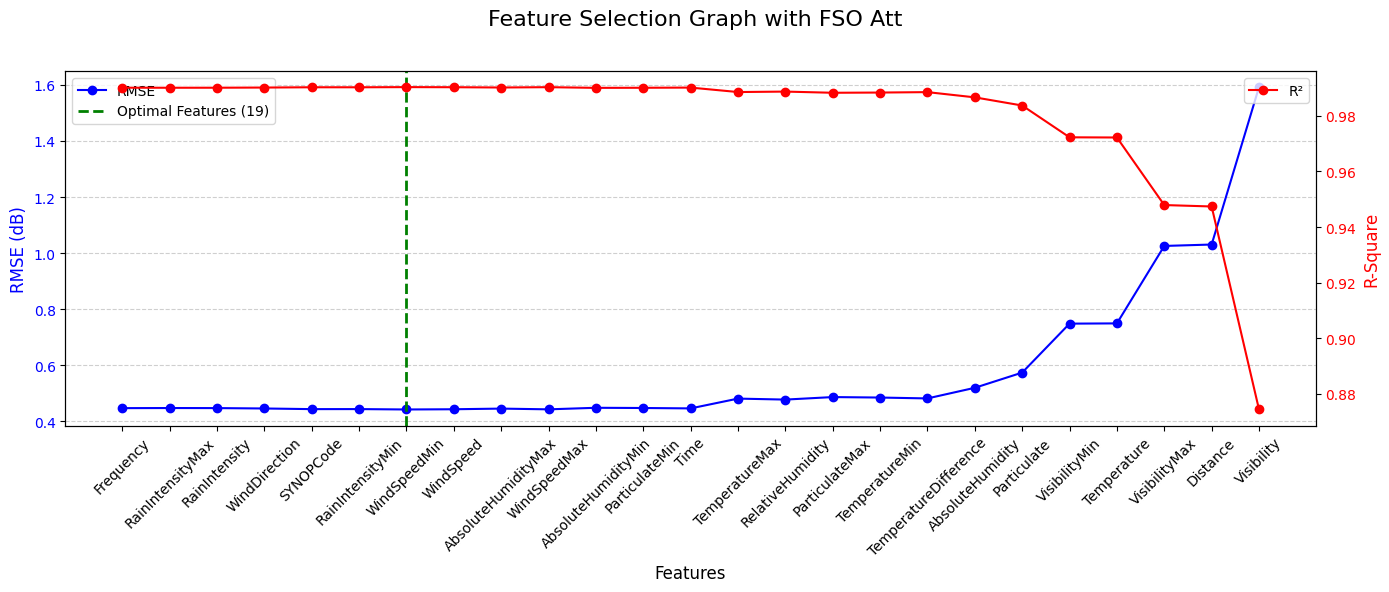

In [16]:
import matplotlib.pyplot as plt

# Prepare x-axis labels to show all removed features in elimination order
x_labels = results['Removed_Feature'].fillna('Final Features')  # Handle the last row with remaining features
optimal_feature_index = 19  # Specify the optimal number of features

# Create a figure
fig, ax1 = plt.subplots(figsize=(14, 6))

# Plot RMSE with the primary y-axis
ax1.plot(x_labels, results['RMSE'], marker='o', label='RMSE', color='blue')
ax1.set_xlabel('Features', fontsize=12)
ax1.set_ylabel('RMSE (dB)', fontsize=12, color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.tick_params(axis='x', rotation=45)  # Rotate x-axis labels for readability
ax1.grid(axis='y', linestyle='--', alpha=0.6)

# Create a secondary y-axis for R²
ax2 = ax1.twinx()
ax2.plot(x_labels, results['R²'], marker='o', label='R²', color='red')
ax2.set_ylabel('R-Square', fontsize=12, color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add a vertical line for the optimal number of features
optimal_feature_name = x_labels.iloc[len(results) - optimal_feature_index]
ax1.axvline(optimal_feature_name, color='green', linestyle='--', label='Optimal Features (19)', linewidth=2)

# Title and legend
fig.suptitle('Feature Selection Graph with FSO Att', fontsize=16)
fig.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit title
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show the plot
plt.show()


In [8]:
features_removed

['Frequency',
 'RainIntensityMax',
 'RainIntensity',
 'WindDirection',
 'SYNOPCode',
 'RainIntensityMin',
 'WindSpeedMin',
 'WindSpeed',
 'AbsoluteHumidityMax',
 'WindSpeedMax',
 'AbsoluteHumidityMin',
 'ParticulateMin',
 'Time',
 'TemperatureMax',
 'RelativeHumidity',
 'ParticulateMax',
 'TemperatureMin',
 'TemperatureDifference',
 'AbsoluteHumidity',
 'Particulate',
 'VisibilityMin',
 'Temperature',
 'VisibilityMax',
 'Distance',
 'Visibility']